## Prerequisites

Run this cell to prepare the environment. This step is obligatory.

In [ ]:
!pip install retentioneering

# StepSankey

The full text of [Step Sankey](https://doc.retentioneering.com/stable/doc/user_guides/step_sankey.html) user guide is available on the retentioneering website.

## Loading data


In [1]:
import retentioneering
import pandas as pd

from retentioneering import datasets

stream = datasets.load_simple_shop()

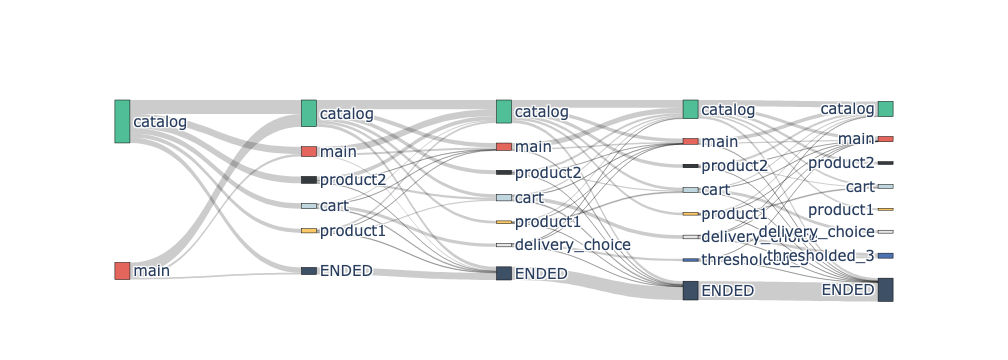

In [2]:
stream.step_sankey(max_steps=5);

## Terminating event


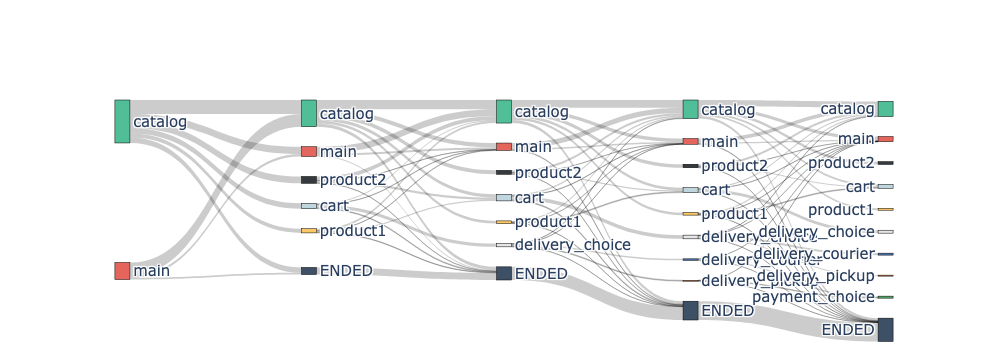

In [3]:
stream.step_sankey(max_steps=5, threshold=0);

## Collapsing rare events


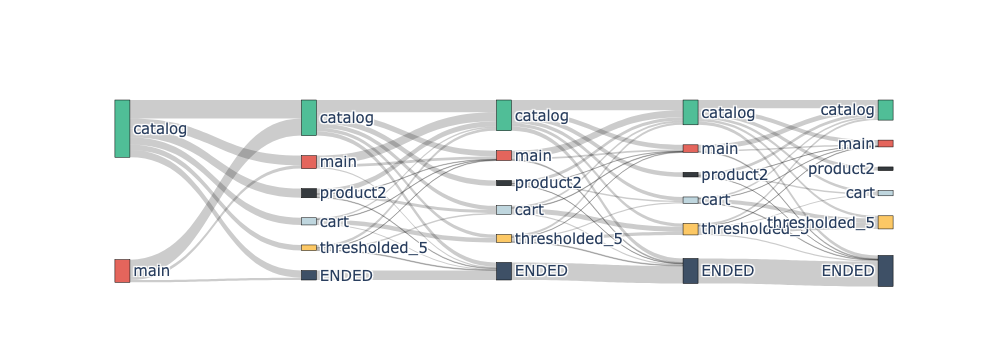

In [4]:
stream.step_sankey(max_steps=5, threshold=0.1)

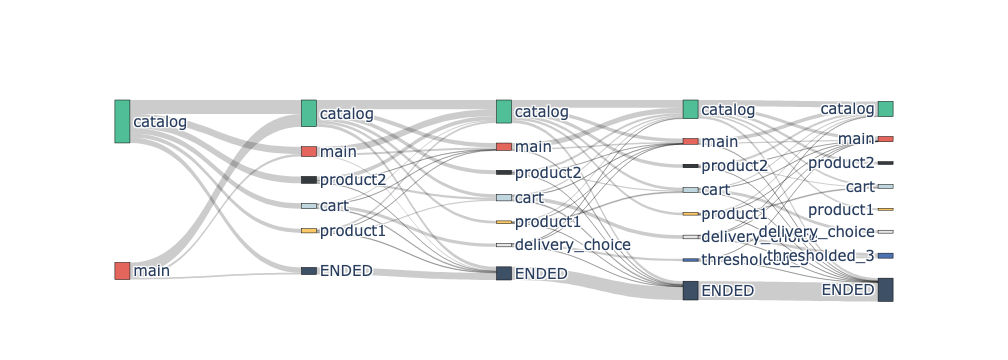

In [5]:
stream\
    .step_sankey(
        max_steps=5,
        threshold=0.1,
        targets=['product1', 'delivery_choice']
    )

## Events sorting

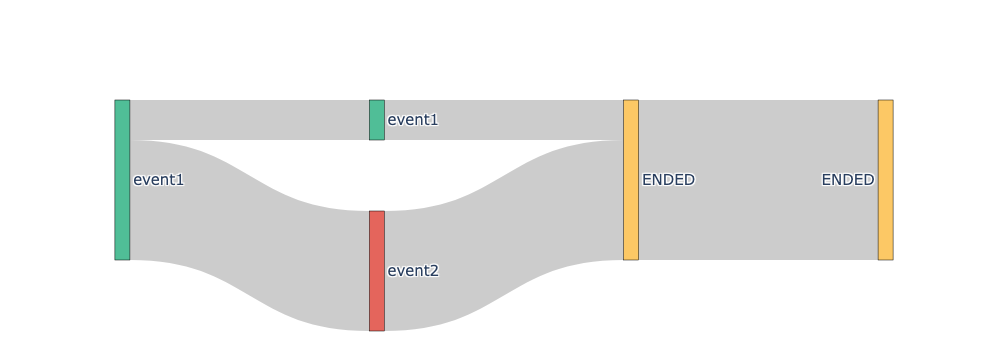

In [6]:
from retentioneering.eventstream import Eventstream

dummy_stream = Eventstream(
    pd.DataFrame(
        [
            [1, 'event1', '2023-01-01 00:00:00'],
            [1, 'event1', '2023-01-01 00:00:00'],
            [2, 'event1', '2023-01-01 00:00:00'],
            [2, 'event2', '2023-01-01 00:00:00'],
            [3, 'event1', '2023-01-01 00:00:00'],
            [3, 'event2', '2023-01-01 00:00:00'],
            [4, 'event1', '2023-01-01 00:00:00'],
            [4, 'event2', '2023-01-01 00:00:00'],
        ],
        columns=['user_id', 'event', 'timestamp']
    )
)
dummy_stream.step_sankey(max_steps=4)

## Using a separate instance


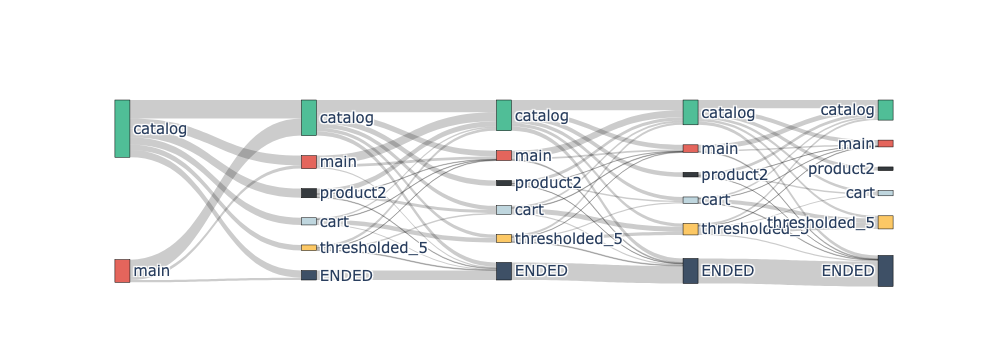

In [7]:
from retentioneering.tooling.step_sankey import StepSankey

step_sankey = StepSankey(stream)
step_sankey.fit(max_steps=5, threshold=0.1)
step_sankey.plot()

## Common tooling properties


### values

In [8]:
# StepSankey graph nodes
stream\
    .step_sankey(show_plot=False)\
    .values[0]

step            event  usr_cnt  usr_cnt_total   perc            color  \
0      1          catalog     2686           3751  71.61   (80, 190, 151)   
1      1             main     1065           3751  28.39   (228, 101, 92)   
2      2          catalog     1670           3751  44.52   (80, 190, 151)   
3      2             main      609           3751  16.24   (228, 101, 92)   
4      2         product2      429           3751  11.44     (53, 58, 62)   
..   ...              ...      ...            ...    ...              ...   
66    10             cart       92           3751   2.45  (191, 214, 222)   
67    10         product1       42           3751   1.12  (252, 200, 101)   
68    10  delivery_choice       69           3751   1.84  (230, 230, 230)   
69    10    thresholded_6      226           3751   6.03   (76, 114, 176)   
70    10            ENDED     2616           3751  69.74    (62, 80, 102)   

    index  sorting  order_by  
0       0      100       100  
1       1      100       100  
2       2      100         0  
3       3      100         1  
4       4      100       100  
..    ...      ...       ...  
66     66      100        58  
67     67      100        59  
68     68      100        60  
69     69      100        61  
70     70      101        62  

[71 rows x 9 columns]

In [9]:
# StepSankey graph edges
stream\
    .step_sankey(show_plot=False)\
    .values[1]

step          event     next_event  usr_cnt          time_to_next_sum  \
0       1        catalog        catalog      869    0 days 07:05:31.308030   
1       1        catalog           main      452 2228 days 01:07:48.656824   
2       1        catalog       product2      429    0 days 01:12:27.870236   
3       1        catalog           cart      337    0 days 02:31:57.294871   
4       1        catalog          ENDED      336           0 days 00:00:00   
..    ...            ...            ...      ...                       ...   
231     9  thresholded_6  thresholded_6      178    0 days 00:04:34.767242   
232     9  thresholded_6          ENDED       72           0 days 00:00:00   
233     9  thresholded_6           main       44  529 days 14:50:45.823584   
234     9  thresholded_6        catalog        7    0 days 00:00:08.052528   
235     9          ENDED          ENDED     2429           0 days 00:00:00   

     index  next_step  next_index  
0        0          2           2  
1        0          2           3  
2        0          2           4  
3        0          2           5  
4        0          2           7  
..     ...        ...         ...  
231     61         10          69  
232     61         10          70  
233     61         10          64  
234     61         10          63  
235     62         10          70  

[236 rows x 8 columns]

### params



In [10]:
# StepSankey graph nodes
stream\
    .step_sankey(show_plot=False)\
    .params

{'max_steps': 10, 'threshold': 0.05, 'sorting': None, 'targets': None}